In [1]:
# Enable interactive plot
#@formatter:off
%matplotlib inline
%load_ext autoreload
%autoreload 2
#@formatter:on

import numpy as np
import pandas as pd

from metrics.Maokai import bone_lengths_np
from loss.CompositionalLoss import parents
from models.stride import calc_standing_foot_positions

from matplotlib import pyplot as plt

from run import path_resolution
import importlib

/Users/yale/miniconda3_x86/envs/smart-cities/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
debug = False
num_worker = 20
computease = False

data = "RSO_LModule"

SAMPLE_RATE = 30.0
plot_length = int(SAMPLE_RATE * 60) # ie one minute

In [3]:
# path resolution
base_path = path_resolution()

Base path: /Users/yale/Repositories/etap/smart-cities-journal-based-on-jonahs-ma/data/


# Calculate Bone Stability without Rotation

In [17]:
# construct data module
DLModule = getattr(importlib.import_module(f"datasets.{data}"), data)
data_module = DLModule(data_dir=base_path, 
    n_jobs=num_worker, 
    debug=debug, 
    batch_size=1,
    fix_nan=True)

all_datasets = data_module._load_datasets(sessions=[1, 2, 3, 4, 5, 6])
all_optitrack_data = pd.concat([d.optitrack_data.assign(Session=i+1) for i, d in enumerate(all_datasets)])

QUEUEING TASKS | : 100%|██████████| 6/6 [00:00<00:00, 2175.28it/s]
PROCESSING TASKS | : 100%|██████████| 6/6 [00:33<00:00,  5.66s/it]
COLLECTING RESULTS | : 100%|██████████| 6/6 [00:00<00:00, 67288.30it/s]


In [5]:
len(all_optitrack_data) == 128177 # case with fix_nan=False

False

In [6]:
prd_bone_lengths = bone_lengths_np(all_optitrack_data.to_numpy(), False)
prd_bone_stability = float(np.mean(np.std(prd_bone_lengths, axis=0)))
prd_bone_stability_per_joint = {key: float(val) for key, val in (zip(parents.keys(), np.std(prd_bone_lengths, axis=0)))}

prd_bone_stability, prd_bone_stability_per_joint

(15.883125305175781,
 {'Ab': 5.492778778076172,
  'Chest': 1.4836798906326294,
  'Head': 0.12449552118778229,
  'Hip': 0.0,
  'LFArm': 34.66891098022461,
  'LFoot': 3.4683640003204346,
  'LHand': 1.3739638328552246,
  'LShin': 9.350203514099121,
  'LShoulder': 50.73163986206055,
  'LThigh': 11.247577667236328,
  'LToe': 5.780078887939453,
  'LUArm': 50.29336166381836,
  'Neck': 6.1263957023620605,
  'RFArm': 20.4461669921875,
  'RFoot': 8.548443794250488,
  'RHand': 1.199535846710205,
  'RShin': 17.376773834228516,
  'RShoulder': 45.41653060913086,
  'RThigh': 2.281578302383423,
  'RToe': 15.167647361755371,
  'RUArm': 42.96751022338867})

# Calc Steps

In [7]:
data_module.setup('test')
df = data_module.test_data.optitrack_data
df

QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 446.44it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:04<00:00,  4.87s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 7710.12it/s]
QUEUEING TASKS | : 100%|██████████| 1/1 [00:00<00:00, 1677.72it/s]
PROCESSING TASKS | : 100%|██████████| 1/1 [00:05<00:00,  5.12s/it]
COLLECTING RESULTS | : 100%|██████████| 1/1 [00:00<00:00, 8081.51it/s]


Ab                              Chest                          \
        Position                           Position                           
Frame          X           Y           Z          X           Y           Z   
0      23.033207  103.303055   36.184467  25.012589  117.546249   39.102936   
1      23.022785  103.303444   36.199390  25.009745  117.545677   39.117645   
2      23.014381  103.302528   36.213058  25.008375  117.551147   39.127831   
3      23.006104  103.299644   36.220940  25.011042  117.550217   39.139481   
4      23.000666  103.297874   36.227638  25.012627  117.548080   39.141865   
...          ...         ...         ...        ...         ...         ...   
26694   1.261877   95.134476  125.634529  -0.865508  112.912247  126.532974   
26695  -0.237505   95.579384  125.552773  -2.527917  113.233246  126.425705   
26696  -1.663836   95.938683  125.572121  -4.226001  113.443909  126.391922   
26697  -3.146908   96.181152  125.604820  -5.936515  113.565697  126.446831   
26698  -4.737485   96.290222  125.665627  -7.670053  113.589272  126.590057   

            Head                                Hip  ...   RShoulder  \
        Position                           Position  ...    Position   
Frame          X           Y           Z          X  ...           Z   
0      26.335546  148.416122   38.951595  22.859392  ...   43.866367   
1      26.361185  148.415527   38.972168  22.846285  ...   43.884041   
2      26.389647  148.411438   38.978584  22.835379  ...   43.893444   
3      26.415745  148.401733   39.006069  22.824692  ...   43.909340   
4      26.419909  148.399734   38.996284  22.818047  ...   43.910797   
...          ...         ...         ...        ...  ...         ...   
26694   1.627007  144.508499  122.967949   2.102447  ...  129.098053   
26695  -0.244607  144.886215  123.156296   0.536680  ...  128.944260   
26696  -2.146514  145.148560  123.425507  -0.962385  ...  128.907578   
26697  -4.136984  145.329742  123.846504  -2.497582  ...  129.006088   
26698  -6.133129  145.401230  124.456421  -4.104976  ...  129.233765   

          RThigh                              RToe                        \
        Position                          Position                         
Frame          X          Y           Z          X         Y           Z   
0      32.024818  95.599396   37.015949  43.453289  4.169967   35.604179   
1      32.011509  95.596344   37.030197  43.452339  4.169631   35.603630   
2      32.000473  95.592484   37.045036  43.453182  4.168246   35.603767   
3      31.989819  95.586739   37.052052  43.449524  4.168972   35.602642   
4      31.983334  95.583191   37.053524  43.449673  4.165533   35.602150   
...          ...        ...         ...        ...       ...         ...   
26694   4.291810  88.314728  134.864761  23.017279  5.241531  139.849197   
26695   2.269403  88.760071  134.938889  15.402810  5.067824  141.164078   
26696   0.336476  89.093262  135.060303   6.903770  5.236586  142.324951   
26697  -1.570095  89.265434  135.121811  -1.984158  5.909866  143.362167   
26698  -3.524970  89.289040  135.173508 -10.768600  6.906798  144.297623   

           RUArm                          
        Position                          
Frame          X           Y           Z  
0      42.860344  135.338181   43.283947  
1      42.871891  135.318893   43.304710  
2      42.883797  135.300491   43.288651  
3      42.887390  135.283188   43.291882  
4      42.895889  135.275238   43.289749  
...          ...         ...         ...  
26694  -0.414007  130.797989  143.940918  
26695  -3.116732  131.090240  143.888016  
26696  -5.715191  131.190796  143.927048  
26697  -8.238960  131.134140  144.086609  
26698 -10.732744  130.905243  144.370224  

[26322 rows x 63 columns]

In [8]:
foots, valleys = calc_standing_foot_positions(df, sample_rate=SAMPLE_RATE)

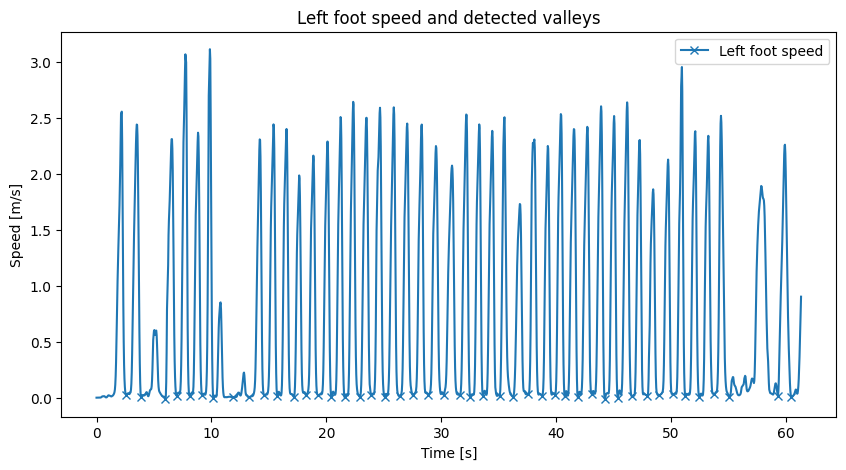

In [9]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

plt_valleys = valleys[:plot_length]
plt_foots = foots['i']['LFoot'][foots['i']['LFoot'] < plot_length]
ax.plot(plt_valleys['LFoot', 'Speed'].index / SAMPLE_RATE, plt_valleys['LFoot', 'Speed'], '-x', markevery=plt_foots, label="Left foot speed")

plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.title("Left foot speed and detected valleys")
plt.legend()
plt.show()

# Save speeds to file

In [21]:
_, valleys_all = calc_standing_foot_positions(all_optitrack_data.drop('Session', axis=1), sample_rate=SAMPLE_RATE)

In [25]:
speeds = pd.DataFrame()
speeds['Session'] = all_optitrack_data['Session']
speeds['LFoot'] = valleys_all['LFoot', 'Speed']
speeds['RFoot'] = valleys_all['RFoot', 'Speed']
speeds.to_csv('speeds.csv', index=False)
speeds

,Session,LFoot,RFoot
0,1,0.011134,0.001905
1,1,0.007457,0.001551
2,1,0.004199,0.001277
3,1,0.001953,0.001132
4,1,0.000988,0.001083
...,...,...,...
26694,6,0.023081,1.938683
26695,6,0.025953,2.159220
26696,6,0.027592,2.274569
26697,6,0.026440,2.289894


In [27]:
# # Merge into gait_strides
# gait_strides = pd.read_csv('gait_strides.csv')
# gait_strides['LFoot Speed'] = speeds[speeds['Session'] == 1]['LFoot']
# gait_strides['RFoot Speed'] = speeds[speeds['Session'] == 1]['RFoot']
# gait_strides.to_csv('gait_strides.csv', index=False)